# Netflix Movies and TV Shows Clustering 

# Import Libraries & Load Dataset

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,os
# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Warnings
import warnings
warnings.filterwarnings('ignore')
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Load Dataset

In [2]:
# Load the CSV file
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploratory Data Analysis (EDA)

## 3. Basic Information

In [3]:
print(f"Dataset Shape: {df.shape}")
print("\n--- Dataset Info ---")
df.info()

Dataset Shape: (7787, 12)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Understanding Dataset Columns


In [4]:
# Dataset Columns
print("Columns in the dataset:")
print(df.columns)

# Identifying Numerical and Categorical columns
numerical_columns = ['release_year', 'date_added', 'duration']
categorical_columns = ['type', 'director', 'cast', 'country', 'listed_in']

print(f'Numerical Columns: {numerical_columns}')
print(f'Categorical Columns: {categorical_columns}')


print('\nSummary of Data Set:')
display(df.describe(include='all'))

print('\nSummary of Numerical Data:')
display(df[numerical_columns].describe())
display(df[['date_added', 'duration']].describe())

print('\nSummary of Categorical Data:')
display(df[categorical_columns].describe())


Columns in the dataset:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Numerical Columns: ['release_year', 'date_added', 'duration']
Categorical Columns: ['type', 'director', 'cast', 'country', 'listed_in']

Summary of Data Set:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN



Summary of Numerical Data:


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


,date_added,duration
count,7777,7787
unique,1565,216
top,"January 1, 2020",1 Season
freq,118,1608



Summary of Categorical Data:


,type,director,cast,country,listed_in
count,7787,5398,7069,7280,7787
unique,2,4049,6831,681,492
top,Movie,"Raúl Campos, Jan Suter",David Attenborough,United States,Documentaries
freq,5377,18,18,2555,334


### Data Set Explanation:

**show_id**: Unique identifier for each title

**type**: Indicates whether the entry is a "Movie" or "TV Show"

**title**: Name of the movie/TV show

**director**: Name of the director(s) (contains missing values)

**cast**: Main actors in the content (contains missing values)

**country**: Country where the content was produced (contains missing 
values)

**date_added**: Date when the content was added to Netflix

**release_year**: Year the content was released

**rating**: Content rating (e.g., TV-MA, PG-13)

**duration**: Movie runtime or number of TV show seasons

**listed_in**: Genre classification (e.g., Drama, Comedy, Horror)

**description**: Short synopsis of the content


## duration Columns Values Analysis

In [5]:
# Assuming 'df' is your DataFrame and 'type' is the column for Movie/TV Show
# and 'duration' is the column with durations.

# Check for rows where the duration is given in seasons
season_rows = df[df['duration'].str.contains('Season')]

# Now count how many of these are TV Shows and how many are Movies
tv_shows_with_seasons = season_rows[season_rows['type'] == 'TV Show']
movies_with_seasons = season_rows[season_rows['type'] == 'Movie']

# Print counts
print("TV Shows with seasons as duration:", len(tv_shows_with_seasons))
print("Movies with seasons as duration:", len(movies_with_seasons))


TV Shows with seasons as duration: 2410
Movies with seasons as duration: 0


## 4. Missing Values Analysis

Missing Values Summary:
            Missing Count  Current Records  Total Records  Percentage (%)
director             2389             5398           7787       30.679337
cast                  718             7069           7787        9.220496
country               507             7280           7787        6.510851
date_added             10             7777           7787        0.128419
rating                  7             7780           7787        0.089893


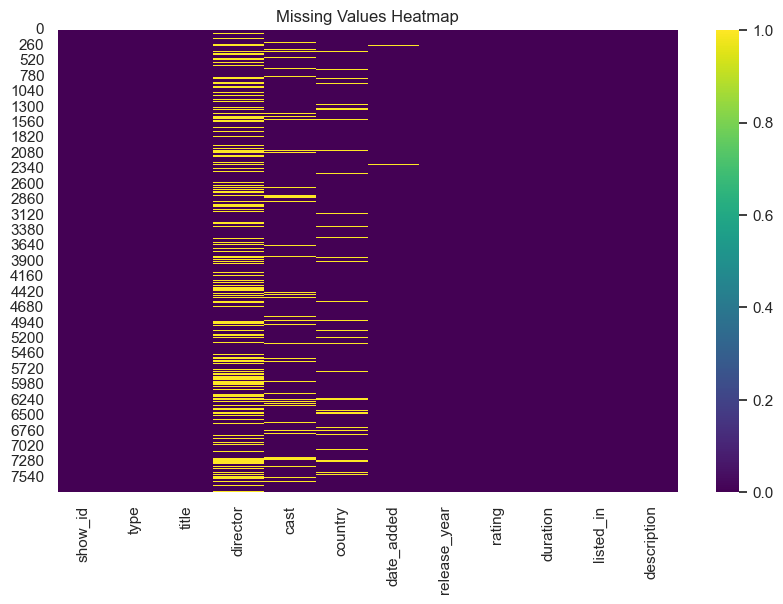

In [6]:
# Calculate missing values, total values, and percentage
missing_count = df.isnull().sum()
total_count = len(df)
current_records = df.count()
missing_percentage = (missing_count / total_count) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Current Records': current_records, 'Total Records': total_count, 'Percentage (%)': missing_percentage})

# Filter to show only columns with missing values
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 5. Duplicate Records Check

In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [8]:
duplicates = df[['title']].duplicated().sum()
print(f"Number of duplicate title records: {duplicates}")

Number of duplicate title records: 0


### Existing Pattern

In [9]:
duplicates = df[['cast','director','release_year','rating']].duplicated().sum()
print(f"Existing Pattern Records: {duplicates}")

Existing Pattern Records: 278


In [10]:
duplicate_groups = (
    df.groupby(['cast', 'director', 'release_year', 'rating'])['title']
    .apply(list)
    .reset_index()
)
duplicate_groups = duplicate_groups[duplicate_groups['title'].str.len() > 1]
print(duplicate_groups)

                                                   cast             director  \
218   Alden Ehrenreich, Woody Harrelson, Emilia Clar...           Ron Howard   
271   Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...   Trivikram Srinivas   
972                                       Craig Sechler        Oliver Twinch   
1067                                     Dave Chappelle          Stan Lathan   
1500  G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...          Rajiv Menon   
2004  Jeannie Elias, Kat Feller, Sandy Fox, Cindy Ro...           Ron Myrick   
3344  Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday...        Abhijit Panse   
3352  Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...       Sekhar Kammula   
3358  Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...         Ozan Açıktan   
3633  Prabhas, Rana Daggubati, Anushka Shetty, Taman...       S.S. Rajamouli   
3635  Prabhas, Rana Daggubati, Anushka Shetty, Taman...       S.S. Rajamouli   
3682                                   R

In [11]:
duplicate_groups = (
    df.groupby(['cast', 'director'])['title']
    .agg(title_list=list, count='count')
    .reset_index()
)

duplicate_groups = duplicate_groups[duplicate_groups['count'] > 1]

duplicate_groups


,cast,director,title_list,count
218,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",Ron Howard,"[Solo: A Star Wars Story, Solo: A Star Wars St...",2
256,Ali Wong,Jay Karas,"[Ali Wong: Baby Cobra, Ali Wong: Hard Knock Wife]",2
270,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",Trivikram Srinivas,"[Ala Vaikunthapurramuloo, Angu Vaikuntapurathu...",2
329,Amy Schumer,Amy Schumer,"[Amy Schumer Growing, Amy Schumer: The Leather...",2
631,Bill Burr,Jay Karas,"[Bill Burr: I'm Sorry You Feel That Way, Bill ...",3
637,Bill Hicks,Chris Bould,"[Bill Hicks: Relentless, Bill Hicks: Revelations]",2
668,Bo Burnham,"Bo Burnham, Christopher Storer","[Bo Burnham: Make Happy, Bo Burnham: what.]",2
876,Chris D'Elia,Bill D'Elia,"[Chris D'Elia: Incorrigible, Chris D'Elia: Man...",2
965,Craig Sechler,Oliver Twinch,"[NOVA: Killer Hurricanes, NOVA: Killer Volcanoes]",2
984,D.L. Hughley,Jay Chapman,"[D.L. Hughley: Clear, D.L. Hughley: Contrarian]",2


## 6. Univariate Analysis

### Content Type Distribution (Movie vs TV Show)

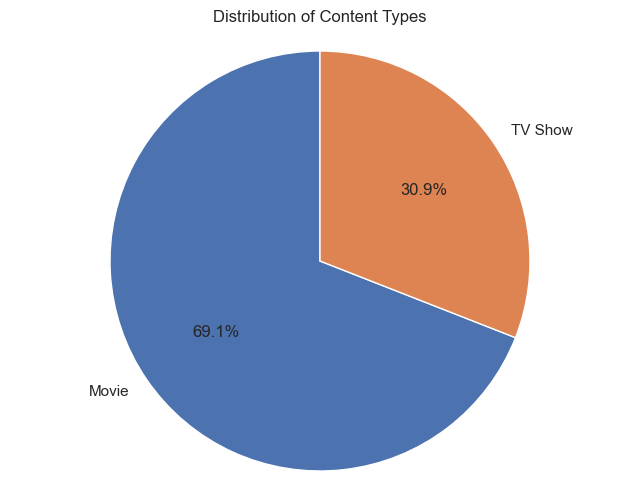

In [12]:
# Count values
type_counts = df['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Content Types')
plt.axis('equal')  # Makes the pie circular
plt.show()


### Rating Distribution

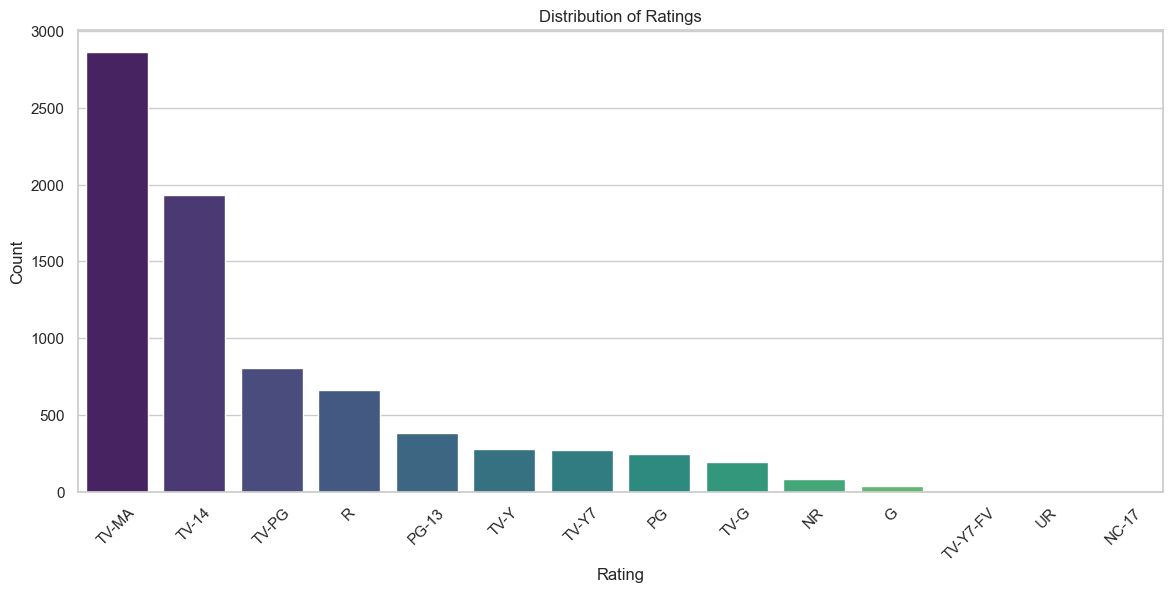

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Release Year Distribution

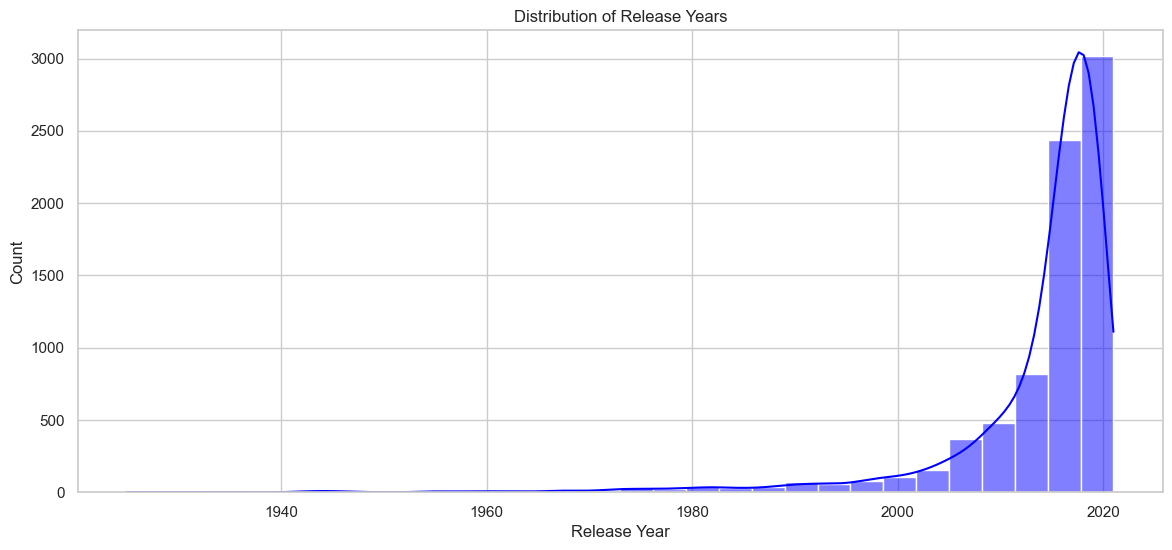

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

## 7. Bivariate Analysis

### Content Type vs Release Year

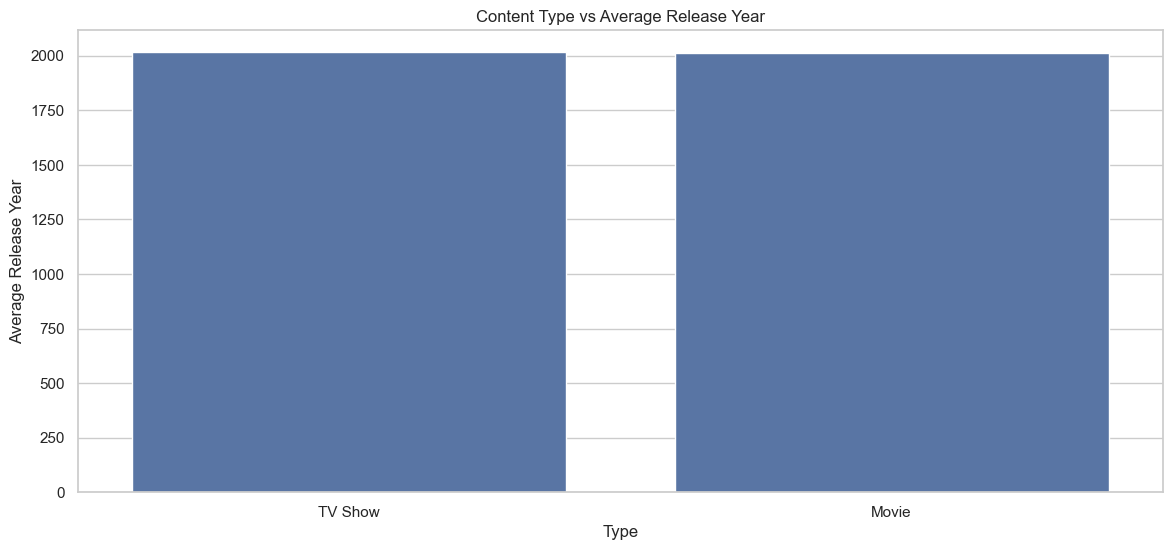

In [15]:
plt.figure(figsize=(14, 6))
sns.barplot(x='type', y='release_year', data=df)
plt.title('Content Type vs Average Release Year')
plt.xlabel('Type')
plt.ylabel('Average Release Year')
plt.show()

## 8. Genre Analysis

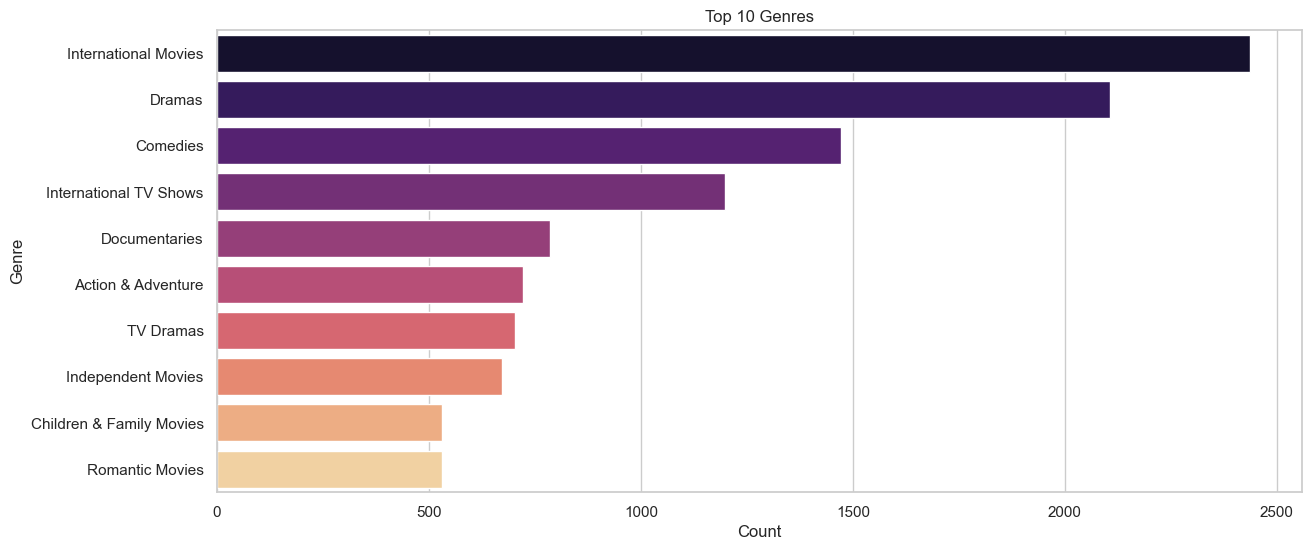

In [16]:
# Split the 'listed_in' column which contains comma-separated values
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Visualize Top 10 Genres
plt.figure(figsize=(14, 6))
sns.countplot(y=genres, order=genres.value_counts().index[:10], palette='magma')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## 9. Country-wise Analysis

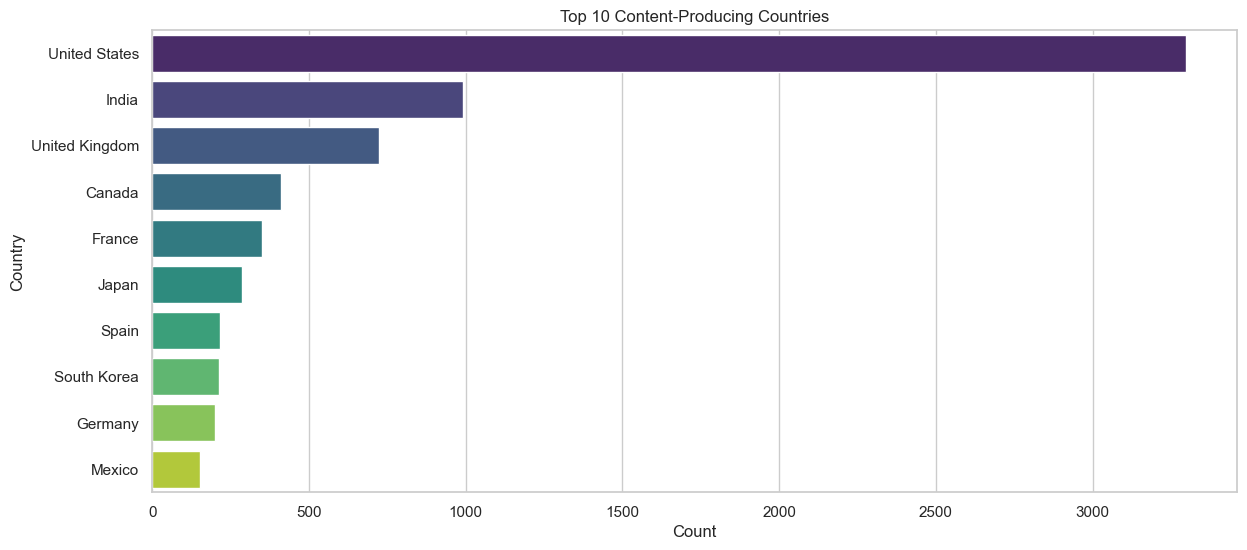

In [17]:
# Handle missing country values by filling with a placeholder or dropping (here we just take value_counts)
# Some entries might have multiple countries, we usually focus on the primary one or split. 
# For this simple analysis, we'll split them to count all occurrences.
countries = df['country'].dropna().str.split(', ', expand=True).stack().reset_index(drop=True)

# Top 10 Countries
plt.figure(figsize=(14, 6))
sns.countplot(y=countries, order=countries.value_counts().index[:10], palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

## 10. Duration Analysis

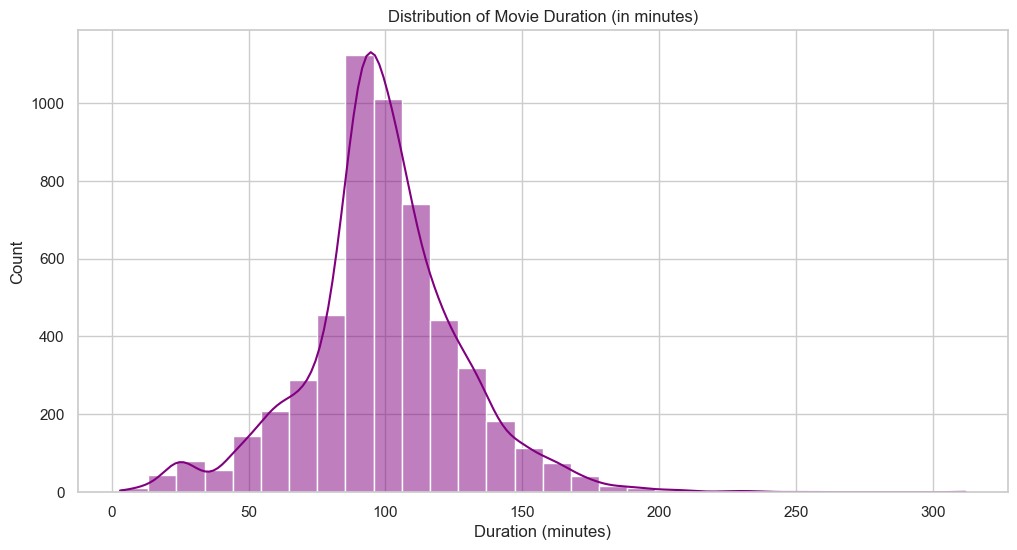

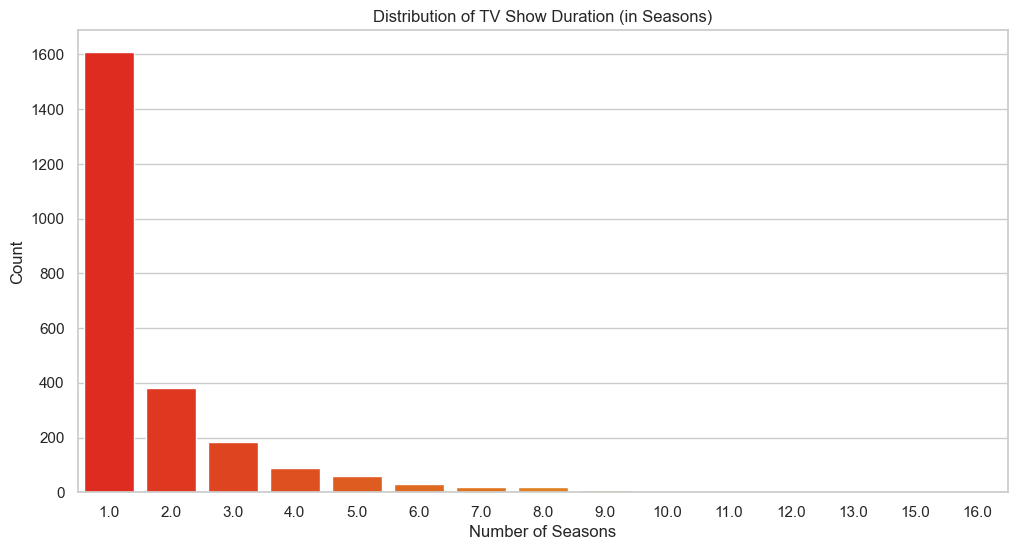

In [18]:
# Separate Movies and TV Shows for duration analysis
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration
movies_df['duration_num'] = movies_df['duration'].str.replace(' min', '').astype(float)
tv_shows_df['duration_num'] = tv_shows_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)

# Plot Movie Duration Distribution
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_num'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Plot TV Show Duration Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='duration_num', data=tv_shows_df, palette='autumn')
plt.title('Distribution of TV Show Duration (in Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

# Features Used for Clustering

no_of_cast → Identifies production scale.

content_age → Distinguishes old vs recent content.

rating → Groups content by audience maturity level.

duration → Differentiates content length and format.

listed_in  → Captures genre and thematic similarity.

# Data Preprocessing 

### Handle missing values .

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year

filling_date_added = df.loc[
    ~df['date_added'].isna(),
    ['show_id','date_added','added_year']
]

date_added_na_values = df.loc[
    df['date_added'].isna(),
    ['show_id','release_year']
]

for index, row in date_added_na_values.iterrows():
    
    i_date_added = filling_date_added.loc[
        filling_date_added['added_year'] >= row['release_year'],
        'date_added'
    ]
    
    if not i_date_added.empty:
        df.loc[index, 'date_added'] = i_date_added.mode()[0]


In [20]:
df[['cast']] = df[[ 'cast']].fillna('Unknown')
df[['director']] = df[[ 'director']].fillna('Unknown')
df[['country']] = df[[ 'country']].fillna('Unknown')
mode_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_rating)



In [21]:
# Calculate missing values, total values, and percentage
missing_count = df.isnull().sum()
total_count = len(df)
current_records = df.count()
missing_percentage = (missing_count / total_count) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Current Records': current_records, 'Total Records': total_count, 'Percentage (%)': missing_percentage})

# Filter to show only columns with missing values
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values Summary:
            Missing Count  Current Records  Total Records  Percentage (%)
added_year             98             7689           7787        1.258508


Convert Data Types

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency


“Label encoding introduces artificial order between categories, which affects distance-based clustering. So one-hot encoding is preferred.”

TV-MA (3) > R (2) > PG-13 (1) > PG (0)


# Advanced Feature Engineering

1️⃣ Language Feature
A new language column was created by extracting language information from the title and description (e.g., Tamil, Hindi).
This helps capture regional content patterns for clustering.

2️⃣ Festival Feature
A festival column was added based on keywords in title, description, country, and date (e.g., Christmas, New Year, Diwali).
This helps identify seasonal content and analyze market trends.

# Age Feature Engineering

I created two separate age-related features:

1️⃣ content_age
Represents the age of the content since its release year.

2️⃣ platform_age
Represents how long the content has been available on Netflix, calculated using the full date difference.

I converted these into numeric values (in years or days) and scaled them to ensure they do not dominate other features during clustering.

Since clustering algorithms like K-Means are distance-based, features with large numerical ranges can influence the model more. Scaling ensures balanced contribution from all dimensions.

In [23]:
current_year = 2026
current_date = pd.to_datetime("2026-02-14")

df['content_age'] = current_year - df['release_year']
df['added_year'] = df['date_added'].dt.year
#df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['platform_age'] = (current_date - df['date_added']).dt.days / 365
df['no_of_cast'] = df['cast'].apply(lambda x: len(str(x).split(',')) if x != 'Unknown' else 0)
df['genre_count'] = df['listed_in'].str.count(',') + 1
df= df.drop('added_year', axis=1) 
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_age,platform_age,no_of_cast,genre_count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,6,5.506849,11,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,10,9.150685,6,2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",15,7.158904,9,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",17,8.252055,9,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,18,6.126027,12,1


In [24]:

def convert_duration_to_minutes(value):
    if pd.isna(value):
        return np.nan
    
    value = value.strip()
    
    if 'min' in value:
        return int(value.replace(' min', ''))
    
    elif 'Season' in value:
        seasons = int(value.split(' ')[0])
        return seasons * 10 * 45   # 1 season ≈ 10 episodes × 45 min
    
    else:
        return np.nan
df['duration_num'] = df['duration'].apply(convert_duration_to_minutes)


In [25]:

df = pd.get_dummies(
    df,
    columns=['rating'],
    prefix='rating'
)
df = pd.get_dummies(
    df,
    columns=['type'],
    prefix='type'
)


In [26]:
unique_genres = (
    df['listed_in']
    .str.split(',')
    .explode()
    .str.strip()
    .unique()
)

for genre in unique_genres:
    df[genre] = df['listed_in'].str.contains(genre).astype(int)


In [27]:
# Show duplicate column names (if any)
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [28]:
#df = df.loc[:, ~df.columns.duplicated()]

print(df.shape)
print('df columns=',df.columns)


(7787, 73)
df columns= Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description', 'content_age',
       'platform_age', 'no_of_cast', 'genre_count', 'duration_num', 'rating_G',
       'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR',
       'type_Movie', 'type_TV Show', 'International TV Shows', 'TV Dramas',
       'TV Sci-Fi & Fantasy', 'Dramas', 'International Movies',
       'Horror Movies', 'Action & Adventure', 'Independent Movies',
       'Sci-Fi & Fantasy', 'TV Mysteries', 'Thrillers', 'Crime TV Shows',
       'Docuseries', 'Documentaries', 'Sports Movies', 'Comedies',
       'Anime Series', 'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Mu

In [29]:
selected_columns = [ 'content_age',
       'platform_age', 'no_of_cast', 'genre_count', 'duration_num', 'rating_G',
       'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR',
       'type_Movie', 'type_TV Show', 'International TV Shows', 'TV Dramas',
       'TV Sci-Fi & Fantasy', 'Dramas', 'International Movies',
       'Horror Movies', 'Action & Adventure', 'Independent Movies',
       'Sci-Fi & Fantasy', 'TV Mysteries', 'Thrillers', 'Crime TV Shows',
       'Docuseries', 'Documentaries', 'Sports Movies', 'Comedies',
       'Anime Series', 'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies', 'Cult Movies',
       'TV Horror', 'Stand-Up Comedy & Talk Shows', 'Teen TV Shows',
       'Stand-Up Comedy', 'Anime Features', 'TV Thrillers',
       'Classic & Cult TV']

df_clean = df[selected_columns].copy()
df_clean

,content_age,platform_age,no_of_cast,genre_count,duration_num,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,6,5.506849,11,3,1800,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
1,10,9.150685,6,2,93,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,15,7.158904,9,2,78,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,17,8.252055,9,3,80,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
4,18,6.126027,12,1,123,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,21,5.326027,7,2,99,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
7783,11,6.961644,8,3,111,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
7784,7,5.391781,1,3,44,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
7785,7,5.293151,2,2,450,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0


# Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

# ---- MOVIES ----

df_clean = df_clean.astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


X_scaled = pd.DataFrame(X_scaled, columns=df_clean.columns)
X_scaled.head()

,content_age,platform_age,no_of_cast,genre_count,duration_num,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,-0.692878,-1.176300,0.784889,1.027634,2.883603,-0.070948,-0.019632,-0.104426,-0.180993,-0.228375,...,1.988357,-0.115778,-0.087376,-0.094552,-0.081992,-0.088119,-0.226814,-0.085871,-0.080389,-0.058986
1,-0.236092,1.725370,-0.243986,-0.244574,-0.433113,-0.070948,-0.019632,-0.104426,-0.180993,-0.228375,...,-0.502928,-0.115778,-0.087376,-0.094552,-0.081992,-0.088119,-0.226814,-0.085871,-0.080389,-0.058986
2,0.334890,0.274535,0.373339,-0.244574,-0.462258,-0.070948,-0.019632,-0.104426,-0.180993,-0.228375,...,-0.502928,-0.115778,-0.087376,-0.094552,-0.081992,-0.088119,-0.226814,-0.085871,-0.080389,-0.058986
3,0.563284,0.999952,0.373339,1.027634,-0.458372,-0.070948,-0.019632,-0.104426,-0.180993,4.378764,...,-0.502928,-0.115778,-0.087376,-0.094552,-0.081992,-0.088119,-0.226814,-0.085871,-0.080389,-0.058986
4,0.677480,-0.450882,0.990663,-1.516781,-0.374823,-0.070948,-0.019632,-0.104426,-0.180993,4.378764,...,-0.502928,-0.115778,-0.087376,-0.094552,-0.081992,-0.088119,-0.226814,-0.085871,-0.080389,-0.058986


# The Elbow Method and Silhouette Score

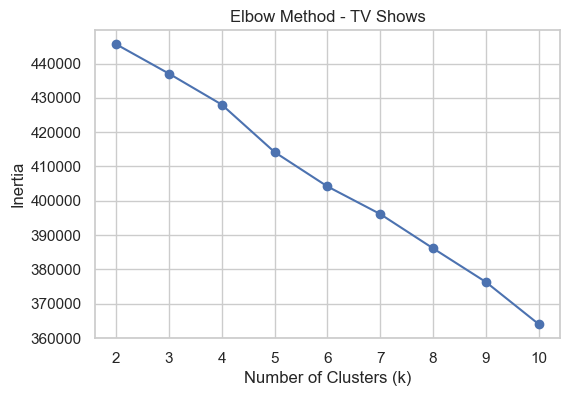

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - TV Shows")
plt.show()


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")


k=2, Silhouette Score=0.1813
k=3, Silhouette Score=0.1861
k=4, Silhouette Score=0.0374
k=5, Silhouette Score=0.0518
k=6, Silhouette Score=0.0604
k=7, Silhouette Score=0.0662
k=8, Silhouette Score=0.0819
k=9, Silhouette Score=0.0849
k=10, Silhouette Score=0.1014


# K-MEANS CLUSTERING

In [33]:
from sklearn.cluster import KMeans

# ===============================
# 🎬 MOVIES (k = 3)
# ===============================

kmeans_movies = KMeans(n_clusters=3, random_state=42)
movie_kmeans_labels = kmeans_movies.fit_predict(X_scaled)

df_clean['kmeans_cluster'] = movie_kmeans_labels


print("\nTV Shows Cluster Counts:\n", df_clean['kmeans_cluster'].value_counts())




TV Shows Cluster Counts:
 kmeans_cluster
0    5318
1    2410
2      59
Name: count, dtype: int64


# HIERARCHICAL CLUSTERING

In [34]:
from sklearn.cluster import AgglomerativeClustering

# ===============================
# 🎬 MOVIES (k = 2)
# ===============================

hier_movies = AgglomerativeClustering(n_clusters=3, linkage='ward')
movie_hier_labels = hier_movies.fit_predict(X_scaled)

df_clean['hierarchical_cluster'] = movie_hier_labels

print("Movies Hierarchical Cluster Counts:\n", 
      df_clean['hierarchical_cluster'].value_counts())



Movies Hierarchical Cluster Counts:
 hierarchical_cluster
2    4934
0    2030
1     823
Name: count, dtype: int64


# DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

# ===============================
# 🎬 MOVIES
# ===============================

dbscan_movies = DBSCAN(eps=1.5, min_samples=5)
movie_db_labels = dbscan_movies.fit_predict(X_scaled)

df_clean['dbscan_cluster'] = movie_db_labels


print("DBSCAN Cluster Counts:\n", 
      df_clean['dbscan_cluster'].value_counts())



DBSCAN Cluster Counts:
 dbscan_cluster
-1      2175
 109     270
 0       130
 16      123
 31      122
        ... 
 232       5
 198       5
 247       5
 254       5
 250       5
Name: count, Length: 260, dtype: int64


# FINAL MODEL COMPARISON CODE

In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

results_tv = []

# --- KMeans ---
sil_k = silhouette_score(X_scaled, movie_kmeans_labels)
db_k = davies_bouldin_score(X_scaled, movie_kmeans_labels)
results_tv.append(["KMeans", sil_k, db_k])

# --- Hierarchical ---
sil_h = silhouette_score(X_scaled, movie_hier_labels)
db_h = davies_bouldin_score(X_scaled, movie_hier_labels)
results_tv.append(["Hierarchical", sil_h, db_h])

# --- DBSCAN (only if >1 cluster exists) ---
if len(set(movie_db_labels)) > 1:
    sil_d = silhouette_score(X_scaled, movie_db_labels)
    db_d = davies_bouldin_score(X_scaled, movie_db_labels)
    results_tv.append(["DBSCAN", sil_d, db_d])

tv_comparison = pd.DataFrame(
    results_tv,
    columns=["Model", "Silhouette Score", "Davies-Bouldin Index"]
)

tv_comparison


,Model,Silhouette Score,Davies-Bouldin Index
0,KMeans,0.186083,2.250380
1,Hierarchical,0.093905,2.728172
2,DBSCAN,0.251467,1.562522


Choose Best Clustering Model 

| Metric     | Better |
| ---------- | ------ |
| Silhouette | Higher |
| DB Index   | Lower  |


In [37]:
print(df_clean['dbscan_cluster'].value_counts())

dbscan_cluster
-1      2175
 109     270
 0       130
 16      123
 31      122
        ... 
 232       5
 198       5
 247       5
 254       5
 250       5
Name: count, Length: 260, dtype: int64


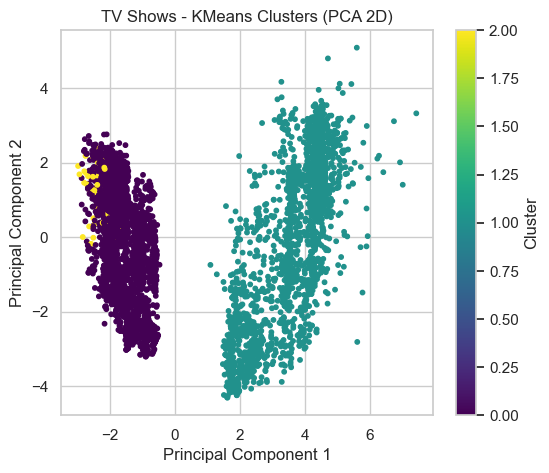

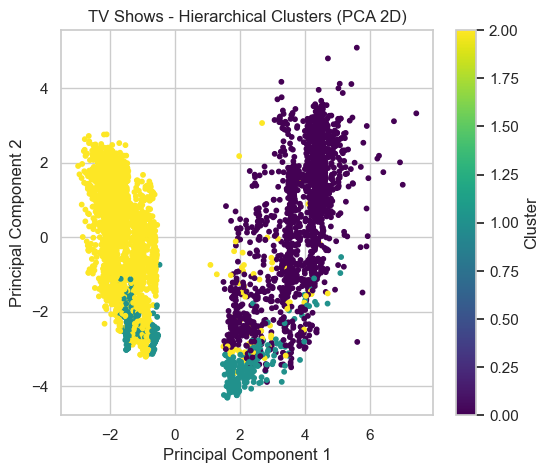

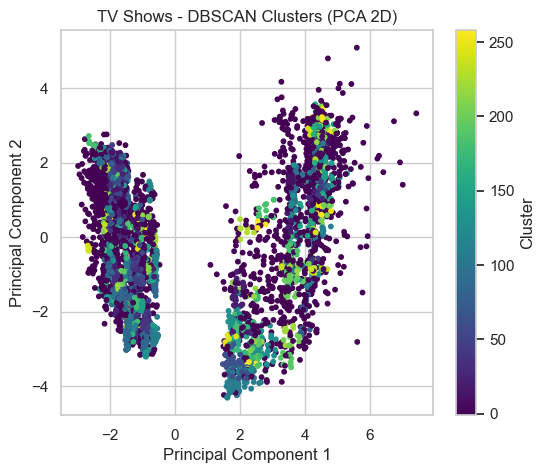

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca_tv = PCA(n_components=2)
X_tv_pca = pca_tv.fit_transform(X_scaled)

# -----------------------------
# K-MEANS
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(X_tv_pca[:, 0], X_tv_pca[:, 1],
            c=df_clean['kmeans_cluster'],
            cmap='viridis', s=10)
plt.title("TV Shows - KMeans Clusters (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# -----------------------------
# HIERARCHICAL
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(X_tv_pca[:, 0], X_tv_pca[:, 1],
            c=df_clean['hierarchical_cluster'],
            cmap='viridis', s=10)
plt.title("TV Shows - Hierarchical Clusters (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# -----------------------------
# DBSCAN
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(X_tv_pca[:, 0], X_tv_pca[:, 1],
            c=df_clean['dbscan_cluster'],
            cmap='viridis', s=10)
plt.title("TV Shows - DBSCAN Clusters (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [39]:
df_clean.groupby('dbscan_cluster')[
    ['content_age','duration_num','no_of_cast','genre_count']
].mean()


,content_age,duration_num,no_of_cast,genre_count
dbscan_cluster,,,,
-1,14.777931,534.805977,8.520920,2.441839
0,10.315385,111.007692,8.453846,2.000000
1,15.269231,114.807692,9.653846,1.000000
2,10.473684,104.368421,7.894737,2.000000
3,12.394737,118.842105,9.947368,1.000000
...,...,...,...,...
254,11.400000,103.200000,10.800000,2.000000
255,6.000000,540.000000,21.000000,3.000000
256,9.000000,1890.000000,10.800000,1.000000


In [40]:
df_movies = df_clean.loc[df_clean['type_Movie']==1].copy()
df_movies= df_movies.drop(['type_Movie','type_TV Show','kmeans_cluster','hierarchical_cluster','dbscan_cluster'], axis=1) 

df_movies_cluster = df_movies.copy()
df_movies.columns

Index(['content_age', 'platform_age', 'no_of_cast', 'genre_count',
       'duration_num', 'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG',
       'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR', 'International TV Shows', 'TV Dramas',
       'TV Sci-Fi & Fantasy', 'Dramas', 'International Movies',
       'Horror Movies', 'Action & Adventure', 'Independent Movies',
       'Sci-Fi & Fantasy', 'TV Mysteries', 'Thrillers', 'Crime TV Shows',
       'Docuseries', 'Documentaries', 'Sports Movies', 'Comedies',
       'Anime Series', 'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', 'Kids' TV',
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Cla

In [41]:
df_tv_Show = df_clean.loc[df_clean['type_TV Show']==1].copy()
df_tv_Show['duration_num'] = (df_tv_Show['duration_num'] / 10 / 45).astype(int)
df_tv_Show= df_tv_Show.drop(['type_Movie','type_TV Show','kmeans_cluster','hierarchical_cluster','dbscan_cluster'], axis=1) 

df_tv_Show_cluster = df_tv_Show.copy()
df_tv_Show.columns

Index(['content_age', 'platform_age', 'no_of_cast', 'genre_count',
       'duration_num', 'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG',
       'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR', 'International TV Shows', 'TV Dramas',
       'TV Sci-Fi & Fantasy', 'Dramas', 'International Movies',
       'Horror Movies', 'Action & Adventure', 'Independent Movies',
       'Sci-Fi & Fantasy', 'TV Mysteries', 'Thrillers', 'Crime TV Shows',
       'Docuseries', 'Documentaries', 'Sports Movies', 'Comedies',
       'Anime Series', 'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', 'Kids' TV',
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Cla

# Scaler After split movie & tv show

In [42]:

df_movies_cluster = df_movies_cluster.drop(columns=['platform_age'])
df_tv_Show_cluster = df_tv_Show_cluster.drop(columns=['platform_age'])

In [43]:
from sklearn.preprocessing import StandardScaler

# ---- MOVIES ----
df_movies_cluster = df_movies_cluster.astype(int)
scaler_movies = StandardScaler()
X_movies_scaled = scaler_movies.fit_transform(df_movies_cluster)

# ---- TV SHOWS ----
df_tv_Show_cluster = df_tv_Show_cluster.astype(int)
scaler_tv = StandardScaler()
X_tv_scaled = scaler_tv.fit_transform(df_tv_Show_cluster)



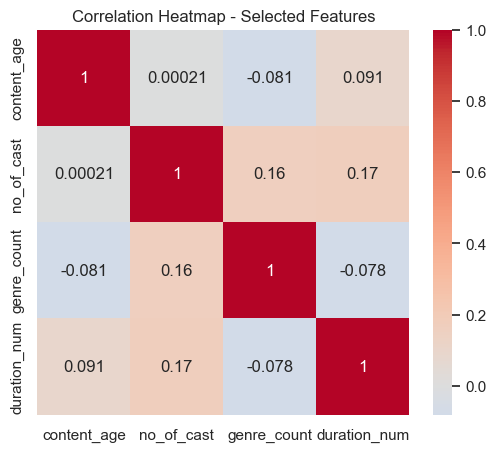

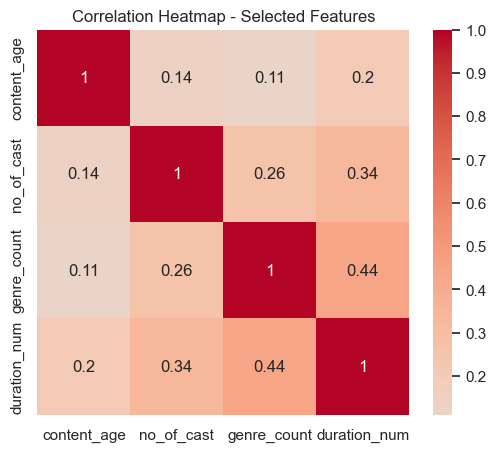

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = [
    'content_age',
    'no_of_cast',
    'genre_count',
    'duration_num'
]

corr_matrix = df_tv_Show_cluster[selected_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap - Selected Features")
plt.show()

corr_matrix = df_movies_cluster[selected_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap - Selected Features")
plt.show()


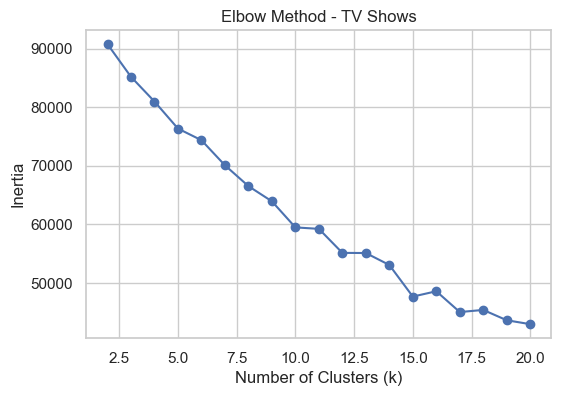

k=2, Silhouette Score=0.1189
k=3, Silhouette Score=0.1185
k=4, Silhouette Score=0.1187
k=5, Silhouette Score=0.1366
k=6, Silhouette Score=0.1503
k=7, Silhouette Score=0.1323
k=8, Silhouette Score=0.1571
k=9, Silhouette Score=0.1642
k=10, Silhouette Score=0.1780
k=11, Silhouette Score=0.1710
k=12, Silhouette Score=0.2078
k=13, Silhouette Score=0.2197
k=14, Silhouette Score=0.2009
k=15, Silhouette Score=0.2509
k=16, Silhouette Score=0.2301
k=17, Silhouette Score=0.2590
k=18, Silhouette Score=0.2456
k=19, Silhouette Score=0.2773
k=20, Silhouette Score=0.2587


In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertia = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k,
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
    kmeans.fit(X_tv_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - TV Shows")
plt.show()


for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, 
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
    labels = kmeans.fit_predict(X_tv_scaled)
    score = silhouette_score(X_tv_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")

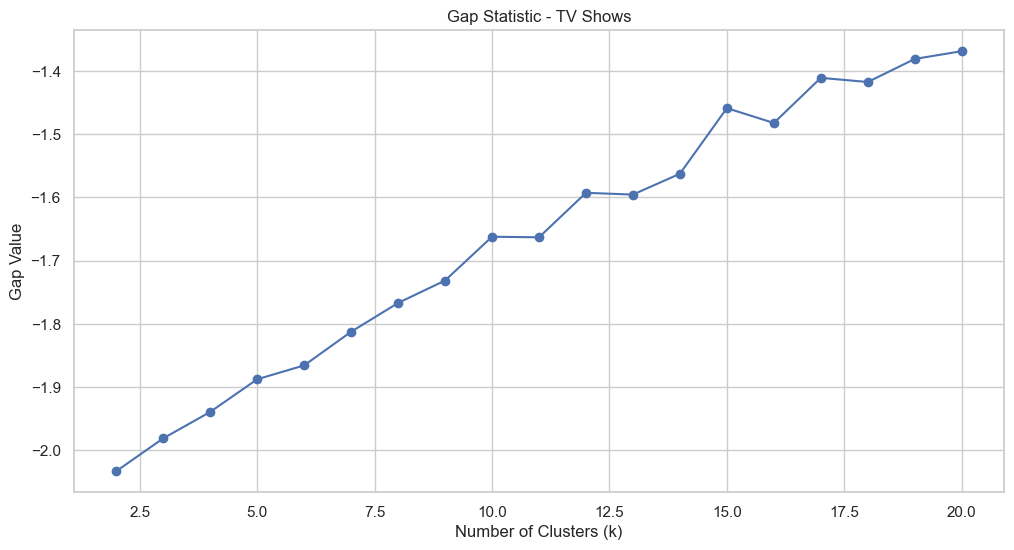

In [46]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def compute_gap_statistic(X, k_range, n_refs=5):
    gaps = []

    for k in k_range:
        # Fit original data
        kmeans = KMeans(n_clusters=k,
        init='random',    # default, best initialization
        n_init=12,           # how many times algorithm runs
        max_iter=3000,        # max iterations per run
        random_state=42)
        kmeans.fit(X)
        orig_dispersion = np.log(kmeans.inertia_)

        ref_disps = []

        for _ in range(n_refs):
            # Generate random reference dataset
            random_data = np.random.random_sample(size=X.shape)
            kmeans_ref = KMeans(n_clusters=k,
            init='random',    # default, best initialization
            n_init=12,           # how many times algorithm runs
            max_iter=3000,        # max iterations per run
            random_state=42)
            kmeans_ref.fit(random_data)
            ref_disps.append(np.log(kmeans_ref.inertia_))

        gap = np.mean(ref_disps) - orig_dispersion
        gaps.append(gap)

    return gaps

k_values = range(2, 21)

gaps = compute_gap_statistic(X_tv_scaled, k_values)

import matplotlib.pyplot as plt

plt.plot(k_values, gaps, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Gap Value")
plt.title("Gap Statistic - TV Shows")
plt.show()



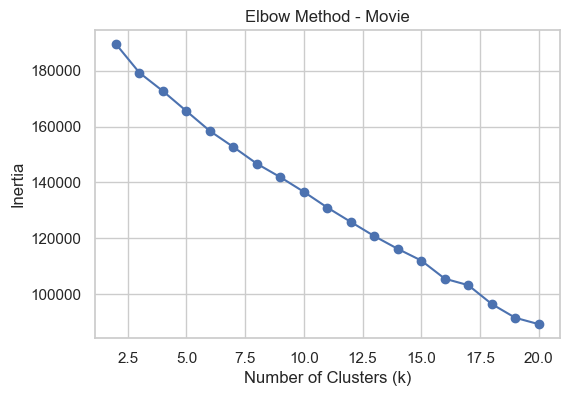

k=2, Silhouette Score=0.1133
k=3, Silhouette Score=0.1163
k=4, Silhouette Score=0.1176
k=5, Silhouette Score=0.1347
k=6, Silhouette Score=0.1481
k=7, Silhouette Score=0.1244
k=8, Silhouette Score=0.1697
k=9, Silhouette Score=0.1711
k=10, Silhouette Score=0.1698
k=11, Silhouette Score=0.1611
k=12, Silhouette Score=0.1903
k=13, Silhouette Score=0.1915
k=14, Silhouette Score=0.1951
k=15, Silhouette Score=0.2131
k=16, Silhouette Score=0.2102
k=17, Silhouette Score=0.2349
k=18, Silhouette Score=0.2251
k=19, Silhouette Score=0.2376
k=20, Silhouette Score=0.2513


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k,
    init='k-means++',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=300,        # max iterations per run
    tol=1e-4,            # convergence tolerance
    algorithm='lloyd',   # default
    random_state=42)
    kmeans.fit(X_movies_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Movie")
plt.show()
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, 
    init='k-means++',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=300,        # max iterations per run
    tol=1e-4,            # convergence tolerance
    algorithm='lloyd',   # default
    random_state=42)
    labels = kmeans.fit_predict(X_movies_scaled)
    score = silhouette_score(X_movies_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")


    


PCA

In [48]:
from sklearn.decomposition import PCA

# Keep 95% variance
pca = PCA(n_components=0.95, random_state=42)

X_tv_pca = pca.fit_transform(X_tv_scaled)

print("Original tv shape:", X_tv_scaled.shape)
print("Reduced tv shape:", X_tv_pca.shape)
print("Explained variance ratio sum:", pca.explained_variance_ratio_.sum())

# Keep 99% variance
pca = PCA(n_components=0.99, random_state=42)

X_movies_pca = pca.fit_transform(X_movies_scaled)

print("Original movies shape:", X_movies_scaled.shape)
print("Reduced movies shape:", X_movies_pca.shape)
print("Explained variance ratio sum:", pca.explained_variance_ratio_.sum())


Original tv shape: (2410, 60)
Reduced tv shape: (2410, 27)
Explained variance ratio sum: 0.9507503321152779
Original movies shape: (5377, 60)
Reduced movies shape: (5377, 34)
Explained variance ratio sum: 0.9906877669703389


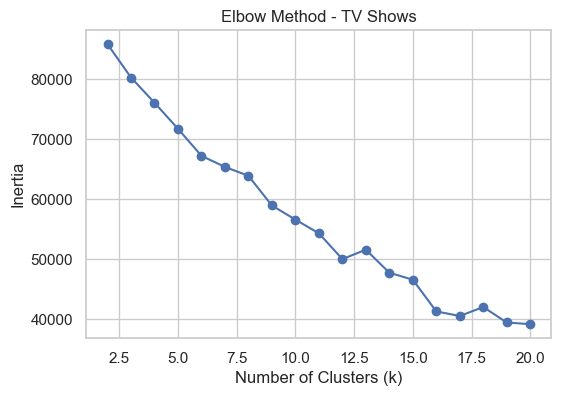

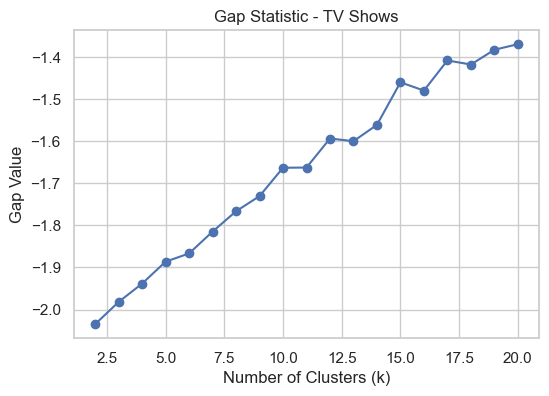

k=2, Silhouette Score=0.1253
k=3, Silhouette Score=0.1262
k=4, Silhouette Score=0.1272
k=5, Silhouette Score=0.1410
k=6, Silhouette Score=0.1461
k=7, Silhouette Score=0.1434
k=8, Silhouette Score=0.1400
k=9, Silhouette Score=0.1951
k=10, Silhouette Score=0.1813
k=11, Silhouette Score=0.1897
k=12, Silhouette Score=0.2365
k=13, Silhouette Score=0.2213
k=14, Silhouette Score=0.2317
k=15, Silhouette Score=0.2391
k=16, Silhouette Score=0.2843
k=17, Silhouette Score=0.2846
k=18, Silhouette Score=0.2374
k=19, Silhouette Score=0.2949
k=20, Silhouette Score=0.2273


In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertia = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k,
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
    kmeans.fit(X_tv_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - TV Shows")
plt.show()

from sklearn.metrics import pairwise_distances_argmin_min

def compute_gap_statistic(X, k_range, n_refs=5):
    gaps = []

    for k in k_range:
        # Fit original data
        kmeans = KMeans(n_clusters=k,
        init='random',    # default, best initialization
        n_init=12,           # how many times algorithm runs
        max_iter=3000,        # max iterations per run
        random_state=42)
        kmeans.fit(X)
        orig_dispersion = np.log(kmeans.inertia_)

        ref_disps = []

        for _ in range(n_refs):
            # Generate random reference dataset
            random_data = np.random.random_sample(size=X.shape)
            kmeans_ref = KMeans(n_clusters=k,
            init='random',    # default, best initialization
            n_init=12,           # how many times algorithm runs
            max_iter=3000,        # max iterations per run
            random_state=42)
            kmeans_ref.fit(random_data)
            ref_disps.append(np.log(kmeans_ref.inertia_))

        gap = np.mean(ref_disps) - orig_dispersion
        gaps.append(gap)

    return gaps

k_values = range(2, 21)

gaps = compute_gap_statistic(X_tv_scaled, k_values)


plt.figure(figsize=(6,4))
plt.plot(k_values, gaps, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Gap Value")
plt.title("Gap Statistic - TV Shows")
plt.show()


for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, 
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
    labels = kmeans.fit_predict(X_tv_pca)
    score = silhouette_score(X_tv_pca, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")
   

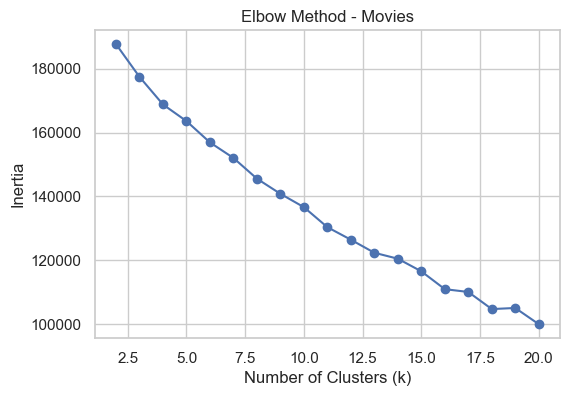

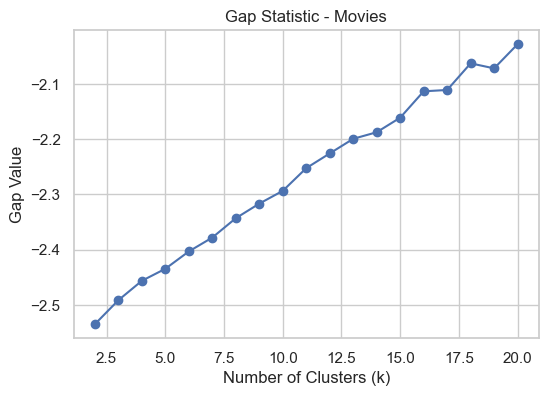

k=2, Silhouette Score=0.1146
k=3, Silhouette Score=0.1176
k=4, Silhouette Score=0.1267
k=5, Silhouette Score=0.1352
k=6, Silhouette Score=0.1496
k=7, Silhouette Score=0.1293
k=8, Silhouette Score=0.1420
k=9, Silhouette Score=0.1425
k=10, Silhouette Score=0.1530
k=11, Silhouette Score=0.1796
k=12, Silhouette Score=0.2002
k=13, Silhouette Score=0.1808
k=14, Silhouette Score=0.1952
k=15, Silhouette Score=0.1828
k=16, Silhouette Score=0.2035
k=17, Silhouette Score=0.2179
k=18, Silhouette Score=0.2203
k=19, Silhouette Score=0.2192
k=20, Silhouette Score=0.2109


In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertia = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k,
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
    kmeans.fit(X_movies_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 21), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Movies")
plt.show()

from sklearn.metrics import pairwise_distances_argmin_min

def compute_gap_statistic(X, k_range, n_refs=5):
    gaps = []

    for k in k_range:
        # Fit original data
        kmeans = KMeans(n_clusters=k,
        init='random',    # default, best initialization
        n_init=12,           # how many times algorithm runs
        max_iter=3000,        # max iterations per run
        random_state=42)
        kmeans.fit(X)
        orig_dispersion = np.log(kmeans.inertia_)

        ref_disps = []

        for _ in range(n_refs):
            # Generate random reference dataset
            random_data = np.random.random_sample(size=X.shape)
            kmeans_ref = KMeans(n_clusters=k,
            init='random',    # default, best initialization
            n_init=12,           # how many times algorithm runs
            max_iter=3000,        # max iterations per run
            random_state=42)
            kmeans_ref.fit(random_data)
            ref_disps.append(np.log(kmeans_ref.inertia_))

        gap = np.mean(ref_disps) - orig_dispersion
        gaps.append(gap)

    return gaps

k_values = range(2, 21)

gaps = compute_gap_statistic(X_movies_pca, k_values)

plt.figure(figsize=(6,4))
plt.plot(k_values, gaps, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Gap Value")
plt.title("Gap Statistic - Movies")
plt.show()

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, 
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
    labels = kmeans.fit_predict(X_movies_pca)
    score = silhouette_score(X_movies_pca, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")
   

In [51]:
from sklearn.cluster import KMeans

k_movies = 11  # or best from silhouette
k_tv = 12     # based on your result

kmeans_movies = KMeans(n_clusters=k_movies, 
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
df_movies['kmeans_cluster'] = kmeans_movies.fit_predict(X_movies_pca)

kmeans_tv = KMeans(n_clusters=k_tv, 
    init='random',    # default, best initialization
    n_init=12,           # how many times algorithm runs
    max_iter=3000,        # max iterations per run
    random_state=42)
df_tv_Show['kmeans_cluster'] = kmeans_tv.fit_predict(X_tv_pca)

In [52]:
from sklearn.cluster import AgglomerativeClustering

# Movies
hier_movies = AgglomerativeClustering(n_clusters=11)
df_movies['hier_cluster'] = hier_movies.fit_predict(X_movies_pca)

# TV Shows
hier_tv = AgglomerativeClustering(n_clusters=12)
df_tv_Show['hier_cluster'] = hier_tv.fit_predict(X_tv_pca)


In [53]:
from sklearn.cluster import DBSCAN

# Movies
db_movies = DBSCAN(eps=1.5, min_samples=10)
df_movies['db_cluster'] = db_movies.fit_predict(X_movies_pca)

# TV Shows
db_tv = DBSCAN(eps=1.5, min_samples=10)
df_tv_Show['db_cluster'] = db_tv.fit_predict(X_tv_pca)


# Choose Best Clustering Model 

| Metric     | Better |
| ---------- | ------ |
| Silhouette | Higher |
| DB Index   | Lower  |


In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np

results_tv = []
results_movies = []

# --- KMeans ---
sil_k = silhouette_score(X_tv_pca, df_tv_Show['kmeans_cluster'])
db_k = davies_bouldin_score(X_tv_pca, df_tv_Show['kmeans_cluster'])
results_tv.append(["tv_Show","KMeans", sil_k, db_k])

# --- Hierarchical ---
sil_h = silhouette_score(X_tv_pca, df_tv_Show['hier_cluster'])
db_h = davies_bouldin_score(X_tv_pca, df_tv_Show['hier_cluster'])
results_tv.append(["tv_Show","Hierarchical", sil_h, db_h])

# --- DBSCAN (ignore noise = -1) ---
db_labels = df_tv_Show['db_cluster']
unique_clusters = set(db_labels) - {-1}

if len(unique_clusters) > 1:
    sil_d = silhouette_score(X_tv_pca, db_labels)
    db_d = davies_bouldin_score(X_tv_pca, db_labels)
    results_tv.append(["tv_Show","DBSCAN", sil_d, db_d])

tv_comparison = pd.DataFrame(
    results_tv,
    columns=["Data","Model", "Silhouette Score", "Davies-Bouldin Index"]
)

# --- KMeans ---
sil_k = silhouette_score(X_movies_pca, df_movies['kmeans_cluster'])
db_k = davies_bouldin_score(X_movies_pca, df_movies['kmeans_cluster'])
results_movies.append(["movies","KMeans", sil_k, db_k])

# --- Hierarchical ---
sil_h = silhouette_score(X_movies_pca, df_movies['hier_cluster'])
db_h = davies_bouldin_score(X_movies_pca, df_movies['hier_cluster'])
results_movies.append(["movies","Hierarchical", sil_h, db_h])

# --- DBSCAN (ignore noise = -1) ---
db_labels = df_movies['db_cluster']
unique_clusters = set(db_labels) - {-1}

if len(unique_clusters) > 1:
    sil_d = silhouette_score(X_movies_pca, db_labels)
    db_d = davies_bouldin_score(X_movies_pca, db_labels)
    results_movies.append(["movies","DBSCAN", sil_d, db_d])

movies_comparison = pd.DataFrame(
    results_movies,
    columns=["Data","Model", "Silhouette Score", "Davies-Bouldin Index"]
)


print(movies_comparison)
print(tv_comparison)

     Data         Model  Silhouette Score  Davies-Bouldin Index
0  movies        KMeans          0.179605              1.852589
1  movies  Hierarchical          0.157927              1.705758
2  movies        DBSCAN          0.261139              1.582565
      Data         Model  Silhouette Score  Davies-Bouldin Index
0  tv_Show        KMeans          0.236483              1.476145
1  tv_Show  Hierarchical          0.210473              1.419208
2  tv_Show        DBSCAN          0.195556              1.517370


🎯 Final Best Conclusion

Movies → DBSCAN

TV Shows → KMeans

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_movies_pca)
    score = silhouette_score(X_movies_pca, labels)
    scores.append((k, score))

print(scores)

[(2, 0.11362505027755751), (3, 0.1219036583537348), (4, 0.11897540630957011), (5, 0.0857184425271381), (6, 0.12053636347151263), (7, 0.13973728962654164), (8, 0.13824142879699255), (9, 0.12985546362325007), (10, 0.14376692736609278), (11, 0.1656520302018991), (12, 0.183077858865443), (13, 0.2090955955255602), (14, 0.2075273275146146), (15, 0.21108218026347586), (16, 0.22072103219493394), (17, 0.22952555692943), (18, 0.23624285729438332), (19, 0.23857534061654528), (20, 0.2461166587260674)]


In [56]:
from sklearn.cluster import DBSCAN

for eps in [0.3, 0.5, 0.7, 0.9, 1.2]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_movies_pca)

    if len(set(labels)) > 1:
        score = silhouette_score(X_movies_pca, labels)
        print("eps:", eps, "Silhouette:", score)

eps: 0.3 Silhouette: -0.2625186238945919
eps: 0.5 Silhouette: 0.007515224680109637
eps: 0.7 Silhouette: 0.18331678349949015
eps: 0.9 Silhouette: 0.2704350082680852
eps: 1.2 Silhouette: 0.31901233119098715


In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for linkage in ['ward', 'complete', 'average', 'single']:
    model = AgglomerativeClustering(n_clusters=20, linkage=linkage)
    labels = model.fit_predict(X_movies_pca)
    score = silhouette_score(X_movies_pca, labels)
    print(linkage, score)

ward 0.23773379596502847
complete 0.16178152894984332
average 0.27199706520921735
single 0.2861318705163106


In [58]:
import numpy as np
print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", list(labels).count(-1))

Number of clusters: 20
Noise points: 0


I tuned KMeans up to K=20, but the silhouette score remained below 0.3.
After tuning DBSCAN, I obtained a higher silhouette score of 0.319 at eps=1.2.
Therefore, DBSCAN was selected as the final clustering model for Movies.

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

tv_scores = []

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_tv_pca)
    score = silhouette_score(X_tv_pca, labels)
    tv_scores.append((k, score))

print(tv_scores)

[(2, 0.12619517185470258), (3, 0.09679567312369139), (4, 0.11843265200238672), (5, 0.09741174436650755), (6, 0.11915436978475173), (7, 0.14305494687409065), (8, 0.15279114188159088), (9, 0.17119619340044107), (10, 0.17460293575692956), (11, 0.19170607498218936), (12, 0.20633329423983007), (13, 0.2222604120514387), (14, 0.2549547662698829), (15, 0.25993066390298325), (16, 0.25392503859566234), (17, 0.2542262713941474), (18, 0.2568040897106911), (19, 0.2589301672674349), (20, 0.27957075338764087)]


In [60]:
from sklearn.cluster import DBSCAN

for eps in [0.3, 0.5, 0.7, 0.9, 1.2]:
    model = DBSCAN(eps=eps, min_samples=5)
    labels = model.fit_predict(X_tv_pca)

    if len(set(labels)) > 1:
        score = silhouette_score(X_tv_pca, labels)
        print("eps:", eps, "Silhouette:", score)

eps: 0.3 Silhouette: -0.22464967021941706
eps: 0.5 Silhouette: -0.02253353616601581
eps: 0.7 Silhouette: 0.1976234821691136
eps: 0.9 Silhouette: 0.2602151468726079
eps: 1.2 Silhouette: 0.30870748325216496


In [61]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=10, linkage=linkage)
    labels = model.fit_predict(X_tv_pca)
    score = silhouette_score(X_tv_pca, labels)
    print(linkage, score)

ward 0.18484049836960817
complete 0.3724447131936132
average 0.37245684923280964


🏁 Final Project Conclusion

Movies → DBSCAN (eps=1.2) → 0.319

TV Shows → Hierarchical (complete linkage) → 0.372

In [62]:
from sklearn.cluster import DBSCAN

# Use the best epsilon found, which is 1.2
db = DBSCAN(eps=1.2, min_samples=5)
final_movie_labels = db.fit_predict(X_movies_pca)

# Store the final cluster labels
df_movies['final_cluster'] = final_movie_labels


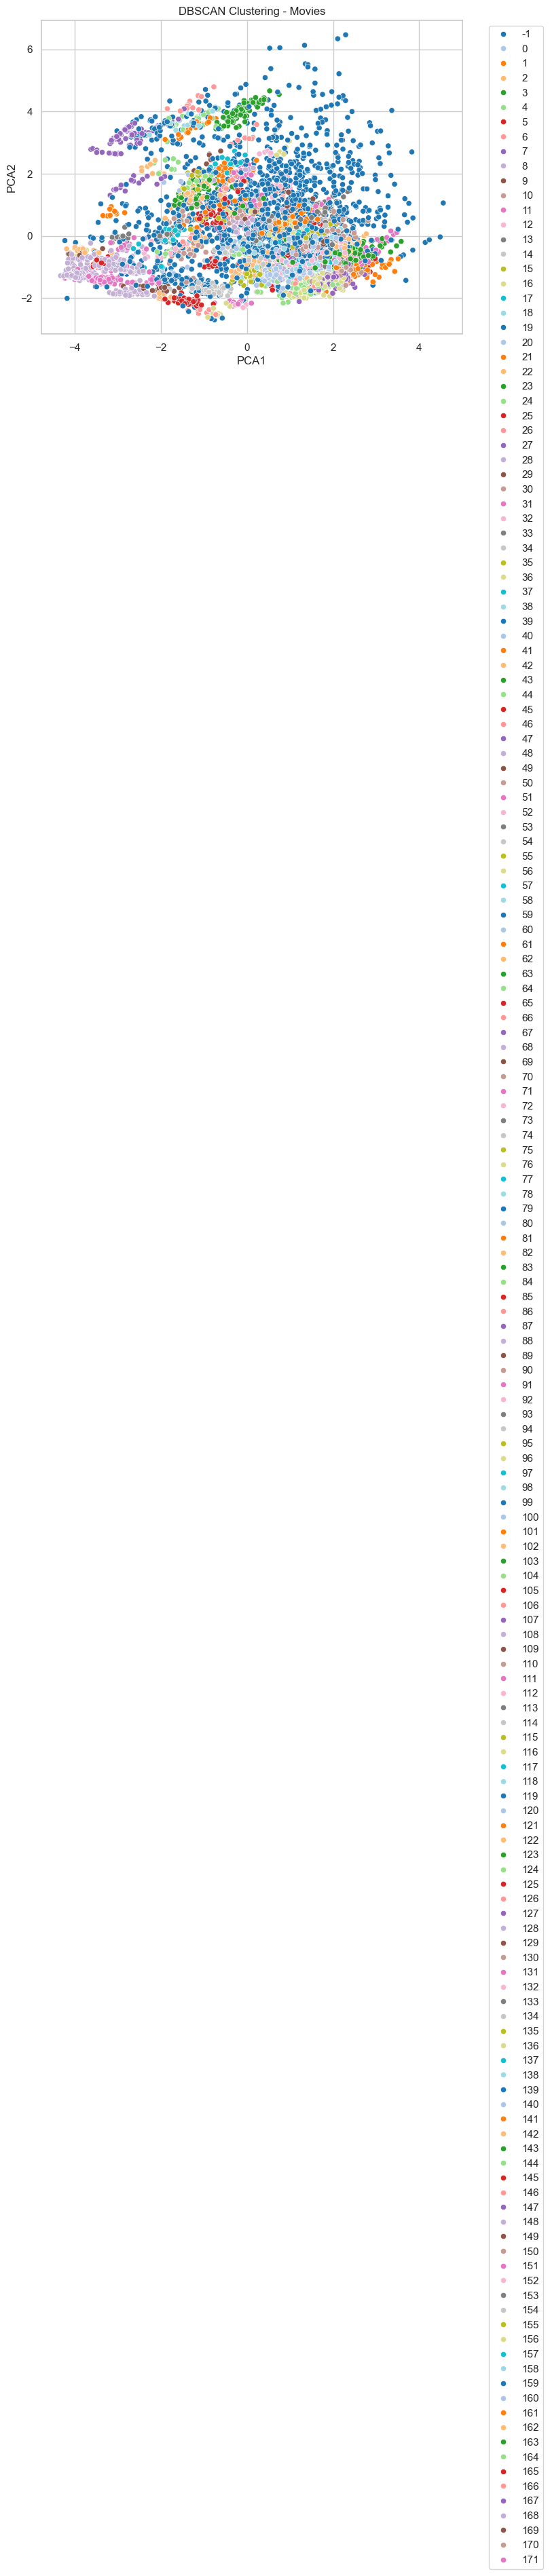

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe for plotting
movies_plot = pd.DataFrame({
    "PCA1": X_movies_pca[:, 0],
    "PCA2": X_movies_pca[:, 1],
    "Cluster": df_movies['final_cluster']
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=movies_plot,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="tab20"
)

plt.title("DBSCAN Clustering - Movies")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering

# Assuming complete linkage was best
hier = AgglomerativeClustering(n_clusters=10, linkage='complete')
final_tv_labels = hier.fit_predict(X_tv_pca)

# Store final cluster labels
df_tv_Show['final_cluster'] = final_tv_labels

In [65]:
df2 = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df_movies_original = df2[df2['type'] == 'Movie'].copy()
df_tv_original = df2[df2['type'] == 'TV Show'].copy()
df_movies_original['final_cluster'] = df_movies['final_cluster']
df_tv_original['final_cluster'] = df_tv_Show['final_cluster']
df_tv_original.to_csv("tv_original.csv", index=False)
df_movies_original.to_csv("movies_original.csv", index=False)

In [66]:
df_tv_original.groupby('final_cluster').size()

final_cluster
0    2273
1      15
2      49
3      51
4       2
5       2
6       4
7       1
8      12
9       1
dtype: int64

In [67]:
print(df_tv_original[df_tv_original['final_cluster'] == 9]['listed_in'])

5137    TV Action & Adventure, TV Comedies, TV Sci-Fi ...
Name: listed_in, dtype: object


In [68]:
df_tv_original[
    df_tv_original['listed_in'].str.contains("Thrillers", na=False) &
    df_tv_original['listed_in'].str.contains("Crime", na=False) &
    df_tv_original['listed_in'].str.contains("International", na=False)  ]['final_cluster'].unique()

array([], dtype=int64)

In [69]:
df_tv_original[
    df_tv_original['listed_in'].str.contains("Adventure", na=False) &
    df_tv_original['listed_in'].str.contains("Action", na=False) &
    df_tv_original['listed_in'].str.contains("Comedies", na=False) &
    df_tv_original['listed_in'].str.contains("Sci-Fi", na=False) &
    df_tv_original['listed_in'].str.contains("Fantasy", na=False)
]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,final_cluster
1780,s1781,TV Show,Disenchantment,NaN,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",United States,"January 15, 2021",2021,TV-14,3 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","Princess duties call, but she'd rather be drin...",0
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",9


In [70]:


df_tv_original.loc[
    df_tv_original['final_cluster'] == 0,
    'cluster_label'
] = 'Modern International Drama & Comedy TV Shows'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 1,
    'cluster_label'
] = 'Classic & Cult TV'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 2,
    'cluster_label'
] = 'International Crime & Thriller TV Shows'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 3,
    'cluster_label'
] = 'Stand-Up Comedy & Talk Show TV'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 4,
    'cluster_label'
] = 'Mature TV Shows (TV-14)'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 5,
    'cluster_label'
] = 'Adult International Drama & Thriller TV Shows'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 6,
    'cluster_label'
] = 'old International Romantic TV Shows (Unrated)'


df_tv_original.loc[
    df_tv_original['final_cluster'] == 7,
    'cluster_label'
] = 'Action & Adventure Kids’ TV Shows'


df_tv_original.loc[
    df_tv_original['final_cluster'] == 8,
    'cluster_label'
] = 'Classic TV shows (US/Canada) with British productions'

df_tv_original.loc[
    df_tv_original['final_cluster'] == 9,
    'cluster_label'
] = 'Classic Action & Adventure TV Shows with Sci-Fi & Comedy Elements'

In [71]:
df_movies['final_cluster'].value_counts().sort_index().to_dict()

{-1: 1337,
 0: 131,
 1: 25,
 2: 38,
 3: 12,
 4: 20,
 5: 16,
 6: 9,
 7: 34,
 8: 37,
 9: 16,
 10: 46,
 11: 50,
 12: 118,
 13: 12,
 14: 51,
 15: 10,
 16: 11,
 17: 5,
 18: 76,
 19: 72,
 20: 61,
 21: 22,
 22: 67,
 23: 117,
 24: 18,
 25: 56,
 26: 10,
 27: 18,
 28: 86,
 29: 5,
 30: 20,
 31: 103,
 32: 12,
 33: 8,
 34: 15,
 35: 23,
 36: 121,
 37: 9,
 38: 9,
 39: 7,
 40: 28,
 41: 45,
 42: 26,
 43: 62,
 44: 62,
 45: 21,
 46: 11,
 47: 48,
 48: 21,
 49: 8,
 50: 32,
 51: 11,
 52: 22,
 53: 30,
 54: 29,
 55: 8,
 56: 14,
 57: 12,
 58: 14,
 59: 40,
 60: 6,
 61: 75,
 62: 10,
 63: 83,
 64: 25,
 65: 36,
 66: 9,
 67: 75,
 68: 72,
 69: 27,
 70: 21,
 71: 12,
 72: 8,
 73: 11,
 74: 6,
 75: 33,
 76: 8,
 77: 5,
 78: 14,
 79: 44,
 80: 34,
 81: 22,
 82: 16,
 83: 30,
 84: 15,
 85: 9,
 86: 10,
 87: 19,
 88: 260,
 89: 13,
 90: 23,
 91: 11,
 92: 30,
 93: 17,
 94: 14,
 95: 5,
 96: 12,
 97: 9,
 98: 6,
 99: 17,
 100: 5,
 101: 11,
 102: 17,
 103: 7,
 104: 8,
 105: 28,
 106: 11,
 107: 5,
 108: 41,
 109: 5,
 110: 36,
 111: 1

In [72]:
noise_percent = (df_movies_original['final_cluster'] == -1).mean() * 100
print("Noise %:", noise_percent)

Noise %: 24.865166449693138


In [73]:
# Create column first

df_movies_original['cluster_label'] = 'Noise / Unclassified Movies'


df_movies_original.loc[
    df_movies_original['final_cluster'] == -1,
    'cluster_label'
] = 'Noise / Unclassified Movies'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 0,
    'cluster_label'
] = 'Modern International Drama Movies (TV-MA)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 1,
    'cluster_label'
] = 'Modern Drama Movies (PG-13)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 2,
    'cluster_label'
] = 'Modern International Horror Movies (TV-MA)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 3,
    'cluster_label'
] = 'Modern International Horror Movies (TV-14)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 4,
    'cluster_label'
] = 'Modern International Horror & Thriller Movies (TV-MA)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 5,
    'cluster_label'
] = 'Modern Thriller & Drama Movies (TV-MA)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 6,
    'cluster_label'
] = 'Modern International Sports Documentary Movies (TV-MA)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 7,
    'cluster_label'
] = 'Modern International Thriller & Drama Movies (TV-14)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 8,
    'cluster_label'
] = 'Adult Drama & Thriller Movies (R)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 9,
    'cluster_label'
] = 'Modern Comedy & Drama Independent Movies (TV-14, Ensemble Cast)'

df_movies_original.loc[
    df_movies_original['final_cluster'] == 10,
    'cluster_label'
] = 'Modern International Independent Drama Movies (TV-14)'


df_movies_original.loc[
    df_movies_original['final_cluster'] == 11,
    'cluster_label'
] = 'International Action & Adventure Drama Movies (TV-14)'

df_movies_original.loc[
    df_movies_original['final_cluster'] == 12,
    'cluster_label'
] = 'International Action & Adventure Drama Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 13, 'cluster_label'] = \
    'Modern Documentary Movies (Unrated)'

df_movies_original.loc[df_movies_original['final_cluster'] == 14, 'cluster_label'] = \
    'Modern Documentary Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 15, 'cluster_label'] = \
    'Modern Comedy Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 16, 'cluster_label'] = \
    'Modern Romantic Comedy Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 17, 'cluster_label'] = \
    'Sports Documentary Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 18, 'cluster_label'] = \
    'Modern Comedy & Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 19, 'cluster_label'] = \
    'Modern Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 20, 'cluster_label'] = \
    'Modern International Comedy Movies (TV-14)'
df_movies_original.loc[df_movies_original['final_cluster'] == 21, 'cluster_label'] = \
    'Action & Adventure Sci-Fi Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 22, 'cluster_label'] = \
    'Modern Romantic Comedy Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 23, 'cluster_label'] = \
    'Modern Comedy & Drama Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 24, 'cluster_label'] = \
    'Classic Action & Adventure Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 25, 'cluster_label'] = \
    'Modern Documentary Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 26, 'cluster_label'] = \
    'Modern Sports Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 27, 'cluster_label'] = \
    'Kids Movies (TV-Y)'

df_movies_original.loc[df_movies_original['final_cluster'] == 28, 'cluster_label'] = \
    'Modern Documentary Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 29, 'cluster_label'] = \
    'Independent Sports Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 30, 'cluster_label'] = \
    'Horror & Thriller Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 31, 'cluster_label'] = \
    'Modern Documentary Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 32, 'cluster_label'] = \
    'Mixed-Genre Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 33, 'cluster_label'] = \
    'Action & Adventure Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 34, 'cluster_label'] = \
    'Modern Horror & Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 35, 'cluster_label'] = \
    'Comedy Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 36, 'cluster_label'] = \
    'Modern Independent Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 37, 'cluster_label'] = \
    'Drama Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 38, 'cluster_label'] = \
    'Independent Horror & Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 39, 'cluster_label'] = \
    'Independent Horror Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 40, 'cluster_label'] = \
    'Comedy & Drama Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 41, 'cluster_label'] = \
    'Independent Drama Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 42, 'cluster_label'] = \
    'Comedy Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 43, 'cluster_label'] = \
    'Action & Adventure Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 44, 'cluster_label'] = \
    'Modern International Drama & Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 45, 'cluster_label'] = \
    'Action & Adventure Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 46, 'cluster_label'] = \
    'Action & Adventure Comedy Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 47, 'cluster_label'] = \
    'Modern International Romantic Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 48, 'cluster_label'] = \
    'Modern International Thriller Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 49, 'cluster_label'] = \
    'Kids & Family Comedy Movies (TV-G)'

df_movies_original.loc[df_movies_original['final_cluster'] == 50, 'cluster_label'] = \
    'Independent Comedy & Drama Movies (TV-MA)'    


In [74]:
cluster_labels = {
    51:  'Independent Comedy & Drama Movies (PG-13)',
    52:  'Romantic Comedy Movies (PG-13)',
    53:  'Independent Comedy & Drama Movies (R)',
    54:  'Modern Independent Drama Movies (TV-MA)',
    55:  'International Action & Drama Movies (R)',
    56:  'Classic Action & Drama Movies (R)',
    57:  'Romantic Independent Drama Movies (TV-MA)',
    58:  'Musical Comedy Movies (TV-PG)',
    59:  'Documentary Movies (TV-PG)',
    60:  'Family Movies (TV-PG)',
    61:  'International Romantic Drama Movies (TV-14)',
    62:  'Kids Animated Movies (TV-Y7)',
    63:  'Family Comedy Movies (PG)',
    64:  'Kids Comedy Movies (TV-Y7)',
    66:  'Independent Comedy Movies (R)',
    67:  'Kids Movies (TV-Y)',
    68:  'Documentary Movies (TV-PG)',
    69:  'Sports Documentaries (TV-MA)',
    70:  'Thriller Movies (R)',
    71:  'Sports Documentaries (TV-14)',
    72:  'International Independent Drama Movies (R)',
    73:  'Documentary Movies (PG-13)',
    74:  'Romantic Independent Drama Movies (R)',
    75:  'International Thriller Movies (TV-MA)',
    76:  'International Drama Movies (PG-13)',
    77:  'LGBTQ+ Independent Drama Movies (R)',
    78:  'Kids Comedy Movies (TV-Y)',
    79:  'Family Movies (TV-Y7)',
    80:  'International Action & Drama Movies (TV-MA)',
    81:  'Family Movies (PG)',
    82:  'Horror Movies (TV-MA)',
    83:  'International Musical Comedy Movies (TV-14)',
    84:  'International Independent Drama Movies (TV-PG)',
    85:  'Musical Drama Movies (TV-14)',
    86:  'International Horror Thriller Movies (TV-14)',
    87:  'Musical Drama Movies (TV-14)',
    88:  'Stand-Up Comedy Movies (TV-MA)',
    89:  'Romantic Drama Movies (PG-13)',
    90:  'Drama Movies (TV-MA)',
    91:  'Documentary Movies (R)',
    92:  'International Drama Movies (TV-PG)',
    93:  'International Romantic Comedy Movies (TV-PG)',
    94:  'Action-Comedy Drama Movies (TV-14)',
    95:  'LGBTQ+ Drama Movies (TV-MA)',
    96:  'International Musical Documentaries (TV-MA)',
    97:  'International Independent Comedy Movies (TV-MA)',
    98:  'LGBTQ+ Romantic Comedy Movies (TV-MA)',
    99:  'Horror Movies (R)',
    100: 'Drama Movies (PG)'
}

for c, label in cluster_labels.items():
    df_movies_original.loc[df_movies_original['final_cluster'] == c, 'cluster_label'] = label

In [75]:
df_movies_original.loc[df_movies_original['final_cluster'] == 101, 'cluster_label'] = \
    'Romantic Drama Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 102, 'cluster_label'] = \
    'Documentary Movies (TV-G)'

df_movies_original.loc[df_movies_original['final_cluster'] == 103, 'cluster_label'] = \
    'International Romantic Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 104, 'cluster_label'] = \
    'Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 105, 'cluster_label'] = \
    'Stand-Up Comedy Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 106, 'cluster_label'] = \
    'Family Movies (G)'

df_movies_original.loc[df_movies_original['final_cluster'] == 107, 'cluster_label'] = \
    'Faith & Spiritual Drama Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 108, 'cluster_label'] = \
    'Music Documentary Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 109, 'cluster_label'] = \
    'International Sci-Fi & Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 110, 'cluster_label'] = \
    'Action & Adventure Comedy Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 111, 'cluster_label'] = \
    'Action & Adventure Comedy Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 112, 'cluster_label'] = \
    'Action Comedy Sci-Fi Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 113, 'cluster_label'] = \
    'Action & Adventure Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 114, 'cluster_label'] = \
    'Sports Drama Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 115, 'cluster_label'] = \
    'Action & Adventure Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 116, 'cluster_label'] = \
    'Independent Drama & Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 117, 'cluster_label'] = \
    'Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 118, 'cluster_label'] = \
    'Action & Adventure Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 119, 'cluster_label'] = \
    'Romantic Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 120, 'cluster_label'] = \
    'Documentary Movies (TV-G)'

df_movies_original.loc[df_movies_original['final_cluster'] == 121, 'cluster_label'] = \
    'Documentary Movies (PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 122, 'cluster_label'] = \
    'Music & Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 123, 'cluster_label'] = \
    'Horror & Thriller Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 124, 'cluster_label'] = \
    'Independent Thriller Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 125, 'cluster_label'] = \
    'Family Drama Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 126, 'cluster_label'] = \
    'Family Drama Movies (PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 127, 'cluster_label'] = \
    'Anime Action & Adventure Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 128, 'cluster_label'] = \
    'Action Sci-Fi & Fantasy Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 129, 'cluster_label'] = \
    'Classic Stand-Up Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 130, 'cluster_label'] = \
    'Independent Action & Drama Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 131, 'cluster_label'] = \
    'Music Documentary Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 132, 'cluster_label'] = \
    'International Music Documentary Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 133, 'cluster_label'] = \
    'Romantic Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 134, 'cluster_label'] = \
    'Independent Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 135, 'cluster_label'] = \
    'International Comedy Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 136, 'cluster_label'] = \
    'Stand-Up Comedy Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 137, 'cluster_label'] = \
    'Family Comedy Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 138, 'cluster_label'] = \
    'Independent Action & Adventure Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 139, 'cluster_label'] = \
    'International LGBTQ+ Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 140, 'cluster_label'] = \
    'Comedy & Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 141, 'cluster_label'] = \
    'Independent Drama Movies (Unrated)'

df_movies_original.loc[df_movies_original['final_cluster'] == 142, 'cluster_label'] = \
    'LGBTQ+ Documentary Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 143, 'cluster_label'] = \
    'Family Sci-Fi Comedy Movies (PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 144, 'cluster_label'] = \
    'Drama & Thriller Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 145, 'cluster_label'] = \
    'LGBTQ+ Independent Drama Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 146, 'cluster_label'] = \
    'Thriller Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 147, 'cluster_label'] = \
    'Independent Horror Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 148, 'cluster_label'] = \
    'Drama & Thriller Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 149, 'cluster_label'] = \
    'Independent Horror Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 150, 'cluster_label'] = \
    'International Documentary Movies (Unrated)'

df_movies_original.loc[df_movies_original['final_cluster'] == 151, 'cluster_label'] = \
    'Comedy & Drama Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 152, 'cluster_label'] = \
    'Musical Action & Adventure Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 153, 'cluster_label'] = \
    'Romantic Drama Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 154, 'cluster_label'] = \
    'Independent Drama Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 155, 'cluster_label'] = \
    'Independent Drama & Thriller Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 156, 'cluster_label'] = \
    'Cult Comedy Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 157, 'cluster_label'] = \
    'Independent Comedy Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 158, 'cluster_label'] = \
    'Anime Action & Adventure Movies (TV-PG)'

df_movies_original.loc[df_movies_original['final_cluster'] == 159, 'cluster_label'] = \
    'Sports Documentary Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 160, 'cluster_label'] = \
    'Comedy Horror Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 161, 'cluster_label'] = \
    'Classic Documentary Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 162, 'cluster_label'] = \
    'Sci-Fi & Thriller Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 163, 'cluster_label'] = \
    'International Action Sci-Fi Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 164, 'cluster_label'] = \
    'Family Movies (TV-G)'

df_movies_original.loc[df_movies_original['final_cluster'] == 165, 'cluster_label'] = \
    'Anime Action & Adventure Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 166, 'cluster_label'] = \
    'Drama & Thriller Movies (PG-13)'

df_movies_original.loc[df_movies_original['final_cluster'] == 167, 'cluster_label'] = \
    'International Comedy Horror Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 168, 'cluster_label'] = \
    'Independent Drama Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 169, 'cluster_label'] = \
    'Romantic Comedy Movies (R)'

df_movies_original.loc[df_movies_original['final_cluster'] == 170, 'cluster_label'] = \
    'Faith & Spiritual Drama Movies (TV-14)'

df_movies_original.loc[df_movies_original['final_cluster'] == 171, 'cluster_label'] = \
    'Music Comedy Movies (TV-MA)'

df_movies_original.loc[df_movies_original['final_cluster'] == 172, 'cluster_label'] = \
    'Mixed Genre Movies'

df_movies_original.loc[df_movies_original['final_cluster'] == 173, 'cluster_label'] = \
    'Other / Miscellaneous Movies'    
    

In [77]:
df_tv_original.to_csv("tv_original.csv", index=False)
df_movies_original.to_csv("movies_original.csv", index=False)